In [1]:
# /Users/teliov/TUD/Thesis/Medvice/Notebooks/data/04_06_new_data/data/split
# So we can use the *thesislib* package
import sys
import os

module_path = os.path.abspath("..")

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd

In [3]:
from thesislib.utils import pathutils

In [4]:
data_file = pathutils.get_data_file("05_03_age_hack/symptoms.csv")

In [5]:
l = pd.read_csv(data_file)

In [6]:
l.columns

Index(['PATIENT', 'AGE', 'GENDER', 'RACE', 'ETHNICITY', 'AGE_BEGIN', 'AGE_END',
       'PATHOLOGY', 'NUM_SYMPTOMS', 'SYMPTOMS'],
      dtype='object')

In [7]:
%matplotlib inline

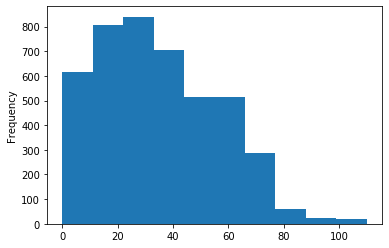

In [8]:
l.AGE.plot.hist()

In [10]:
grp = l.groupby("PATHOLOGY")

In [14]:
import matplotlib.pyplot as plt

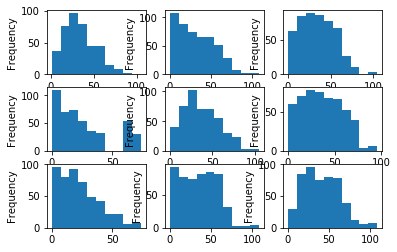

In [20]:
fig, axes = plt.subplots(3, 3)
count = 0
for pathology, df in grp.__iter__():
    idx = int(count / 3)
    jdx = count % 3
    plt.sca(axes[idx, jdx])
    count += 1
    df.AGE_BEGIN.plot.hist()

In [22]:
data_file_all = pathutils.get_data_file("05_03_age_hack/symptoms_all.csv")

In [23]:
df_all = pd.read_csv(data_file_all)

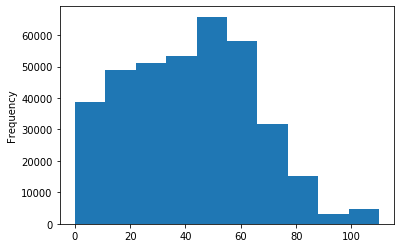

In [30]:
df_all.AGE.plot.hist()

In [31]:
grp1 = df_all.groupby("PATHOLOGY")

In [32]:
sizes = grp1.size()

In [33]:
max_size = sizes.max()
min_size = sizes.min()
mean_size = sizes.mean()
std_size = sizes.std()
print("Max: %d\nMin: %d\nMean: %.3f\nStd: %.3f" % (max_size, min_size, mean_size, std_size))

Max: 617
Min: 25
Mean: 463.052
Std: 85.175


In [47]:
greater_than_mean_1std = sizes.loc[sizes >= (mean_size-std_size)]

In [48]:
greater_than_mean_2std = sizes.loc[sizes >= (mean_size-2*std_size)]

In [57]:
greater_than_mean_3std = sizes.loc[(sizes >= (mean_size-3*std_size)) &  (sizes < (mean_size-2*std_size))]

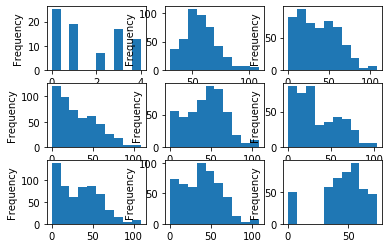

In [60]:
fig, axes = plt.subplots(3, 3)
count = 0
for pathology, df in grp1.__iter__():
    idx = int(count / 3)
    jdx = count % 3
    plt.sca(axes[idx, jdx])
    df.AGE_BEGIN.plot.hist()
    count += 1
    if count >= 9:
        break

In [66]:
really_low = sizes.loc[(sizes >= min_size) &  (sizes < (min_size + std_size))]

In [71]:
really_low

PATHOLOGY
0008fb9c51e070528eb6496adfa53f890a11858ac19c18bc29e1f0a6     81
44a967ff79a88969f8917f066bc2c2b5b7d118c723d4b02f6bf9c398     65
5494f234a9a7c114b8f65483d9e8de404cf5edc25a09ce4de5d3fc1a     25
7a35dfcd6d68c18cec2536cceeb60abb071a3d92df0e1a56309a3861    106
dtype: int64

In [72]:
conditions_db = pathutils.get_data_file("definitions/conditions_db.json")

In [73]:
import json

In [74]:
with open(conditions_db) as fp:
    conditions_db = json.load(fp)

In [75]:
conditions_db["5494f234a9a7c114b8f65483d9e8de404cf5edc25a09ce4de5d3fc1a"]

'Omphalitis'